# Funciones de distribución de probabilidades

# Distribución Uniforme

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000 #debido al rango de datos de 1 a 100 hay que crear muchos datos para que sea una distribución uniforme

data = np.random.uniform(a, b, n) # a debe ser mayor que b

(array([100131.,  99684.,  99890., 100099.,  99960., 100154., 100470.,
         99433., 100313.,  99866.]),
 array([ 1.00019078, 10.90016447, 20.80013817, 30.70011186, 40.60008555,
        50.50005925, 60.40003294, 70.30000663, 80.19998033, 90.09995402,
        99.99992772]),
 <BarContainer object of 10 artists>)

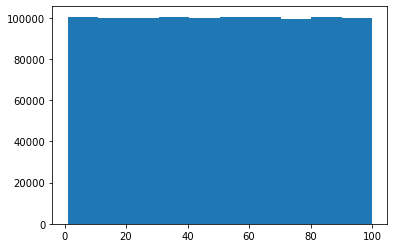

In [3]:
%matplotlib inline

plt.hist(data)

### Distribución normal

In [4]:
data = np.random.randn(1000000) # genera distribucion normal estandar

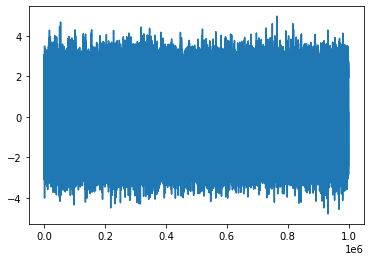

In [5]:
x = range(1, 1000001)
plt.plot(x, data)

(array([7.30000e+01, 2.28300e+03, 2.90140e+04, 1.56363e+05, 3.46773e+05,
        3.21355e+05, 1.22870e+05, 1.99590e+04, 1.26700e+03, 4.30000e+01]),
 array([-4.78381502, -3.80974599, -2.83567697, -1.86160794, -0.88753892,
         0.08653011,  1.06059913,  2.03466816,  3.00873718,  3.98280621,
         4.95687523]),
 <BarContainer object of 10 artists>)

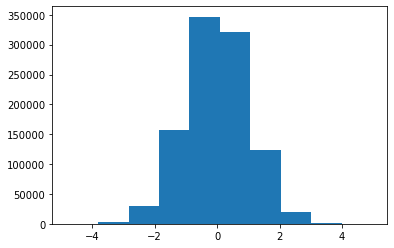

In [6]:
%matplotlib inline
plt.hist(data)

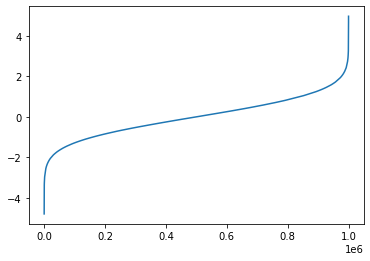

In [7]:
plt.plot(x, sorted(data)) # funcion de distribucion acumulada

(array([  23.,  133.,  681., 1746., 2748., 2616., 1451.,  497.,   95.,
          10.]),
 array([-3.57945089, -1.73512988,  0.10919114,  1.95351215,  3.79783317,
         5.64215419,  7.4864752 ,  9.33079622, 11.17511723, 13.01943825,
        14.86375926]),
 <BarContainer object of 10 artists>)

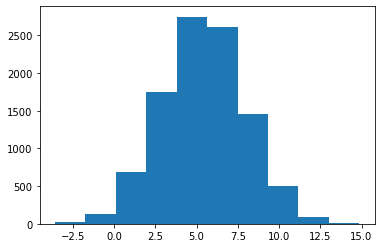

In [8]:
mu = 5.5 #media
sd = 2.5 #desviacion estandar
z_10000 = np.random.randn(10000)
data = mu + sd*z_10000 #  z = (x-mu) / sd --> N(0,1) , x = mu + sd *z
plt.hist(data)

In [9]:
data = np.random.randn(2,4) # (cantidad de grupos, # componentes de cada grupo)
data

array([[-0.37037037,  0.62245885, -0.24988351,  0.40363092],
       [ 0.16620012, -1.57740063, -0.47403947,  0.25712853]])

### La simulación de Monte Carlo

* Generamos 2 numeros aleatorios uniforme x e y entre 0 y 1 1000 veces
* Calcularemos x * x + y * y
    * si el valor es inferior a 1 estoy dentro del circulo
    * si el valor es superior a 1 estoy fuera del circulo

* Calculamos el numero total de veces que estan dentro del ciruclo y lo dividimos entre el numero total de intentos para obtener una paorximacion de la probabilidad de caer dentro del círculo. 
* Usamos dicha probabilidad para aproximar el valor de pi. 
* Repetimos el experimento un numero suficiente de veces (por ej. 1000) para obtener (1000) diferentes aproximaciones de pi.

* Calculamos el promedio de los 1000 experimentos anteriores para dar un valor final de pi.

In [14]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(100):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j]*x[j] + y[j]*y[j])
            if z<=1: 
                value +=1
        float_value = float(value)
        pi_value = float_value *4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/100
    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.137956


(3.137956, [<matplotlib.lines.Line2D at 0x16abc2849a0>])

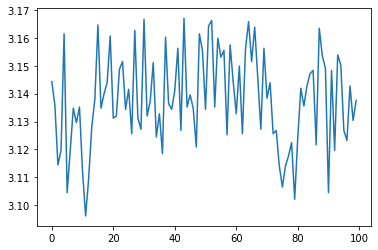

In [15]:
pi_montecarlo(10000, 200)

## Dummy Data Sets

In [19]:
# lista o array de numeros aleatorios 
n = 1000000
data = pd.DataFrame(

    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 *np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }

)

In [21]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000536,1.500467,18.499553
std,1.000393,2.501910,7.798768
min,-5.090534,-10.107990,5.000039
25%,-0.676679,-0.186800,11.740091
50%,-0.000262,1.498847,18.515016
75%,0.674074,3.186834,25.241404
max,4.722536,13.287422,31.999999


(array([8.70000e+01, 2.74600e+03, 3.04010e+04, 1.51084e+05, 3.30075e+05,
        3.19695e+05, 1.37534e+05, 2.61830e+04, 2.11000e+03, 8.50000e+01]),
 array([-10.10798967,  -7.76844847,  -5.42890728,  -3.08936608,
         -0.74982489,   1.58971631,   3.9292575 ,   6.2687987 ,
          8.60833989,  10.94788109,  13.28742228]),
 <BarContainer object of 10 artists>)

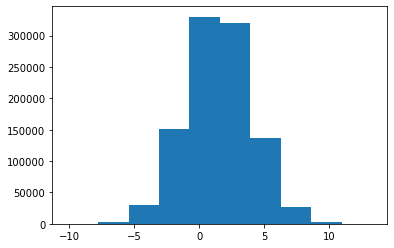

In [25]:
plt.hist(data["B"])

(array([100324., 100178.,  99854.,  99713.,  99383.,  99990., 100566.,
        100313.,  99525., 100154.]),
 array([ 5.00003896,  7.70003494, 10.40003092, 13.10002691, 15.80002289,
        18.50001887, 21.20001485, 23.90001084, 26.60000682, 29.3000028 ,
        31.99999879]),
 <BarContainer object of 10 artists>)

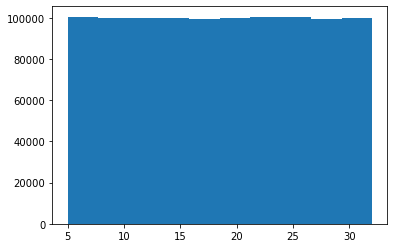

In [27]:
plt.hist(data["C"])

In [29]:
data = pd.read_csv("/Users/Luis Antonio Garza/Python proyectos/python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt")

In [30]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [32]:
column_names = data.columns.values.tolist()

In [33]:
a = len(column_names)
a

21

In [37]:
new_data = pd.DataFrame(

{
  'Column Name' : column_names,
    'A' : np.random.randn(a), 
    'B' : np.random.uniform(0, 1, a)
    
    
}, index = range(42, 42 + a)

)

In [38]:
new_data


,Column Name,A,B
42,State,-0.845317,0.385182
43,Account Length,0.954854,0.665251
44,Area Code,-0.710335,0.752635
45,Phone,-0.594612,0.061269
46,Int'l Plan,-0.684334,0.658644
47,VMail Plan,-0.151374,0.785253
48,VMail Message,0.393313,0.897678
49,Day Mins,-1.310191,0.585658
50,Day Calls,1.692160,0.313531
51,Day Charge,2.422825,0.145723
